In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

In [24]:
class RCPTA:
    def __init__(self,neurons,eta=0.1):
        self.neurons=neurons
        self.eta=eta
        
    def init_weights(self,X,weights):
    	self.weights = np.array(weights)
    	'''if weights:
    	    self.weights = np.array(weights)
    	else:
    	    self.weights =  np.random.random((1+np.array(X).shape[1],self.neurons))
    	'''
        
    def aug_inputs(self,X):
        for x in X:
            x.append(-1)
        return X

    
    def train(self,X,outputs,epochs):
        self.weights =self.weights
        print("Initial Weights : ",self.weights)
        X = self.aug_inputs(X)
        print("Augmented input pattern : ",X)
        self.error_ = []
        epoch=1
        p = 0
        for i in range(epochs):
            print("Epoch : ",epoch)
            err=0
            for x,d in zip(X,outputs):
                out = self.predict(x)
                #print("D : ",d)
                print("For input pattern : ",x)
                print("Output of network : ",out)
                err += 0.5*(d-out)**2
                delta_=[]
                for d_,o_ in zip(d,out):
                    delta_.append(0.5*self.eta*(d_-o_)*self.gradient(o_))
                #print("Delta : ",delta_)
                del_w = []
                
                for del_ in delta_:
                    del_w.append(sum(np.multiply(del_,x)))
                    
                #print("Delta_W is : ",del_w)
                for i in range(len(self.weights)):
                    self.weights[i] = self.weights[i]+del_w[i]    
               
                print("Weights : ",self.weights)
                p+=1
                self.error_.append(sum(np.array(err)**2)/2)
                
            epoch+=1
            print("Error : ",sum(np.array(err)**2)/2)
            if self.error_[-1] <=0.1 :
                break
            
        print("Training Steps Required are {} .".format(p))
        return self
                                                                           
    def get_weights(self):
        return self.weights
                                                                           
    def net_input(self,X):
        return np.dot(self.weights,X)
    
    def activation(self,net):
        return (1-np.exp(-net))/(1+np.exp(-net))
        '''
        res = []
        for net_ in net:
            if net_>0:
                res.append(net_)
            else :
                res.append(0)
        return np.array(res)
        '''
    
    def gradient(self,out):
        #return (1-out**2)
        if out>0:
            return 1
        else :
            return 0
    
    def predict(self,x):
        #print("Net : ",self.net_input(np.array(x)))
        net = self.net_input(np.array(x))
        return self.activation(net)
        

In [25]:
X = [[10,2],[2,-5],[-5,5]]
d = [[1,-1,-1],[-1,1,-1],[-1,-1,1]]
weights = [[1,-2,0],[0,-1,2],[1,3,-1]]

neurons = RCPTA(3,eta=1)
neurons.init_weights(X,weights)
#print("Initial Weights of Neuron are : ",neurons.weights)
neurons.train(X,d,1000)

Initial Weights :  [[ 1 -2  0]
 [ 0 -1  2]
 [ 1  3 -1]]
Augmented input pattern :  [[10, 2, -1], [2, -5, -1], [-5, 5, -1]]
Epoch :  1
For input pattern :  [10, 2, -1]
Output of network :  [ 0.99505475 -0.96402758  0.99999992]
Weights :  [[  1  -1   0]
 [  0  -1   2]
 [ -9  -7 -11]]
For input pattern :  [2, -5, -1]
Output of network :  [ 0.9981779   0.90514825  1.        ]
Weights :  [[ 4  2  3]
 [ 0 -1  1]
 [-5 -3 -7]]
For input pattern :  [-5, 5, -1]
Output of network :  [-0.99999548 -0.99505475  0.99999992]
Weights :  [[ 4  2  3]
 [ 0 -1  1]
 [-5 -3 -7]]
Error :  9.99275859392
Epoch :  2
For input pattern :  [10, 2, -1]
Output of network :  [ 1.         -0.90514825 -1.        ]
Weights :  [[ 4  2  3]
 [ 0 -1  1]
 [-5 -3 -7]]
For input pattern :  [2, -5, -1]
Output of network :  [-0.9866143   0.96402758  0.99998771]
Weights :  [[ 4  2  3]
 [ 0 -1  0]
 [-1  0 -3]]
For input pattern :  [-5, 5, -1]
Output of network :  [-0.99999548 -0.9866143   0.9993293 ]
Weights :  [[ 4  2  3]
 [ 0 -1 

In [21]:
neurons.error_[-1]

0.010873805569745694

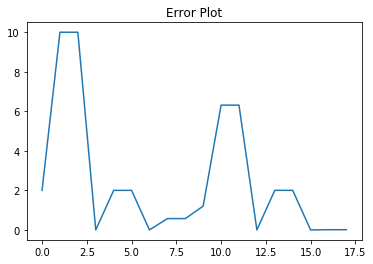

In [27]:
plt.plot(neurons.error_)
plt.title("Error Plot")
plt.show()

In [28]:
neurons.predict([10,2,1])

array([ 1.        , -0.76159416, -0.9999666 ])

In [29]:
print("Final Weights of Neuron are : ")
neurons.weights

Final Weights of Neuron are : 


array([[ 4,  2,  3],
       [ 0, -1,  0],
       [-1,  0, -1]])

### Visualization of Decision Boundaries

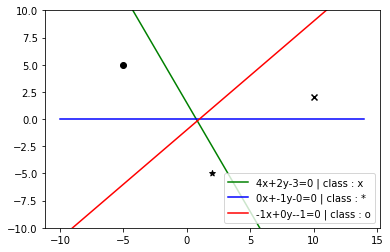

In [36]:
for i,j in zip(X,d):
    plt.scatter(i[0],i[1],c='k' ,marker='x' if j==[1,-1,-1]  else '*' if j==[-1,1,-1] else 'o')

    
x = np.arange(-10,15)
a1,b1,c1 = neurons.weights[0]
y1 = (c1-a1*x)/b1
plt.plot(x,y1,c='g',label='{}x+{}y-{}=0 | class : x'.format(a1,b1,c1))

a2,b2,c2 = neurons.weights[1]
y2 = (c2-a2*x)/b2
plt.plot(x,y2,c='b',label='{}x+{}y-{}=0 | class : *'.format(a2,b2,c2))

a3,b3,c3 = neurons.weights[2]
if b3==0:
    y3 = (c3-a3*x)
else:
    y3 = (c3-a3*x)/b3
plt.plot(x,y3,c='r',label='{}x+{}y-{}=0 | class : o'.format(a3,b3,c3))

plt.ylim([-10,10])
plt.legend()
plt.show()